In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/AI_VIETNAM/AIO2023/ML/Non-Linear-Regression

/content/drive/MyDrive/AI_VIETNAM/AIO2023/ML/Non-Linear-Regression


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#1.Load Data

In [3]:
df = pd.read_csv('./data/Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = df.Level
X

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64

In [5]:
y = df.Salary
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

Text(0, 0.5, 'Salary')

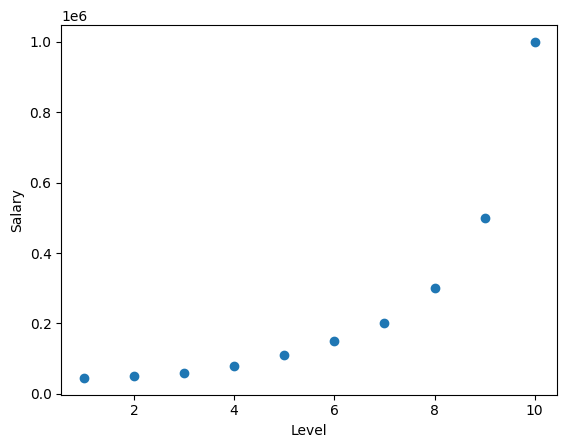

In [6]:
plt.scatter(X, y)
plt.xlabel("Level")
plt.ylabel("Salary")

#2.Linear Regression

In [7]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)

    r2 = 1 - (rss / tss)
    return r2

In [8]:
class LinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs=10000):
        self.X_data = X_data
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_samples = self.X_data.shape[0]

        # Initial Coefficients
        self.theta = np.random.randn(self.X_data.shape[1])
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        loss = (y_pred-y_target)*(y_pred-y_target)
        loss = np.mean(loss)
        return loss

    def predict(self, X_data):
        y_pred = X_data.dot(self.theta)
        return y_pred

    def fit(self):
        for epoch in range(self.num_epochs):
            # predict
            y_pred = self.predict(self.X_data)

            # compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            # compute gradient
            k = 2*(y_pred-self.y_target)
            gradients = self.X_data.T.dot(k)/self.num_samples

            # update weight
            self.theta = self.theta - self.learning_rate*gradients

            print(f'Epoch: {epoch} - Loss: {loss}')

        return {
            'loss': sum(self.losses)/len(self.losses),
            'weight': self.theta
        }

In [9]:
X_linear = X.values.reshape(-1, 1)
X_linear = np.hstack((np.ones((X_linear.shape[0], 1)), X_linear))

In [10]:
X_linear

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [11]:
linear_model = LinearRegression(X_linear, y)
linear_model.fit()

Epoch: 0 - Loss: 142914298486.73553
Epoch: 1 - Loss: 40361242508.33925
Epoch: 2 - Loss: 35586116990.843796
Epoch: 3 - Loss: 35297769373.45521
Epoch: 4 - Loss: 35215862080.82023
Epoch: 5 - Loss: 35144002184.54152
Epoch: 6 - Loss: 35073174069.235596
Epoch: 7 - Loss: 35002959301.40207
Epoch: 8 - Loss: 34933333938.74578
Epoch: 9 - Loss: 34864292178.55839
Epoch: 10 - Loss: 34795829089.82994
Epoch: 11 - Loss: 34727939820.64283
Epoch: 12 - Loss: 34660619561.47814
Epoch: 13 - Loss: 34593863543.20716
Epoch: 14 - Loss: 34527667036.67702
Epoch: 15 - Loss: 34462025352.3721
Epoch: 16 - Loss: 34396933840.08174
Epoch: 17 - Loss: 34332387888.57072
Epoch: 18 - Loss: 34268382925.252636
Epoch: 19 - Loss: 34204914415.865974
Epoch: 20 - Loss: 34141977864.152863
Epoch: 21 - Loss: 34079568811.540516
Epoch: 22 - Loss: 34017682836.825493
Epoch: 23 - Loss: 33956315555.86035
Epoch: 24 - Loss: 33895462621.243187
Epoch: 25 - Loss: 33835119722.009533
Epoch: 26 - Loss: 33775282583.327076
Epoch: 27 - Loss: 3371594696

{'loss': np.float64(26812263694.780743),
 'weight': array([-195333.33333333,   80878.78787879])}

In [12]:
y_pred = linear_model.predict(X_linear)

In [13]:
r2score(y_pred, y)

np.float64(0.6690412331929895)

In [14]:
linear_model.theta

array([-195333.33333333,   80878.78787879])

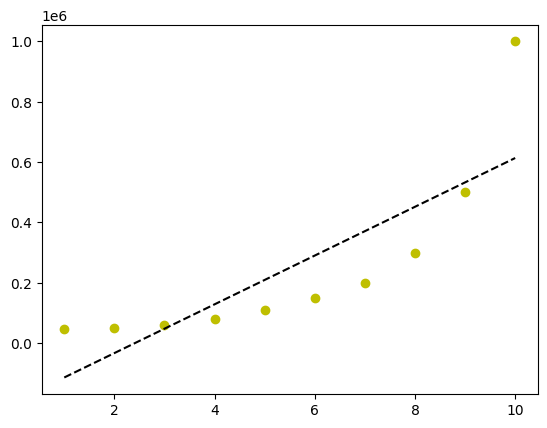

In [15]:
plt.plot(X, y, 'yo', X, linear_model.theta[1]*X + linear_model.theta[0], '--k')
plt.show()

#3.Polymial Regression

In [16]:
def create_polynomial_features(X, degree=2):
    """Creates the polynomial features
    Args:
        X: A array tensor for the data.
        degree: A intege for the degree of
        the generated polynomial function.
    """
    X_new = X
    for d in range(2, degree+1):
        X_new = np.c_[X_new, np.power(X, d)]
    return X_new

##3.1.Polymial Regression with degree = 2

In [17]:
X_poly = create_polynomial_features(X, degree=2)
X_poly

array([[  1,   1],
       [  2,   4],
       [  3,   9],
       [  4,  16],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100]])

In [18]:
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [19]:
poly_model = LinearRegression(X_poly, y, learning_rate=0.0001, num_epochs=10000)
poly_model.fit()

Epoch: 0 - Loss: 142848063600.70392
Epoch: 1 - Loss: 45653672926.95632
Epoch: 2 - Loss: 22693841621.52219
Epoch: 3 - Loss: 17267295873.861473
Epoch: 4 - Loss: 15981898495.038315
Epoch: 5 - Loss: 15674592879.49728
Epoch: 6 - Loss: 15598304307.806381
Epoch: 7 - Loss: 15576582998.575022
Epoch: 8 - Loss: 15567753699.060099
Epoch: 9 - Loss: 15561973227.574604
Epoch: 10 - Loss: 15556916742.56861
Epoch: 11 - Loss: 15552035141.130976
Epoch: 12 - Loss: 15547198727.783794
Epoch: 13 - Loss: 15542376865.884357
Epoch: 14 - Loss: 15537562315.261988
Epoch: 15 - Loss: 15532753361.706799
Epoch: 16 - Loss: 15527949596.176807
Epoch: 17 - Loss: 15523150917.898926
Epoch: 18 - Loss: 15518357298.91388
Epoch: 19 - Loss: 15513568728.46458
Epoch: 20 - Loss: 15508785199.861347
Epoch: 21 - Loss: 15504006707.379639
Epoch: 22 - Loss: 15499233245.527355
Epoch: 23 - Loss: 15494464808.871723
Epoch: 24 - Loss: 15489701391.998478
Epoch: 25 - Loss: 15484942989.50213
Epoch: 26 - Loss: 15480189595.98374
Epoch: 27 - Loss: 1

{'loss': np.float64(11093717213.489601),
 'weight': array([ 14600.62821628, -47838.03507926,  12584.33430516])}

In [20]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

np.float64(0.8736079368341334)

In [21]:
poly_model.theta

array([ 14600.62821628, -47838.03507926,  12584.33430516])

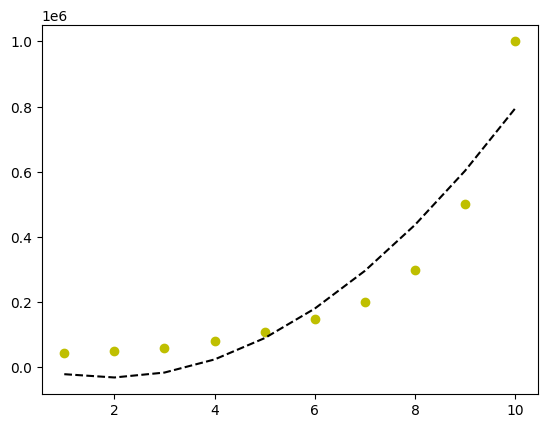

In [22]:
X_plot = df.Level
y_func = poly_model.theta[2]*X*X + poly_model.theta[1]*X + poly_model.theta[0]
plt.plot(X_plot, y, 'yo', X, y_func, '--k')
plt.show()

##3.2.Polymial Regression with degree = 3

In [23]:
X_poly = create_polynomial_features(X, degree=3)
X_poly

array([[   1,    1,    1],
       [   2,    4,    8],
       [   3,    9,   27],
       [   4,   16,   64],
       [   5,   25,  125],
       [   6,   36,  216],
       [   7,   49,  343],
       [   8,   64,  512],
       [   9,   81,  729],
       [  10,  100, 1000]])

In [24]:
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [25]:
poly_model = LinearRegression(X_poly, y, learning_rate=0.0000001, num_epochs=10000)
poly_model.fit()

Epoch: 0 - Loss: 143113661503.08765
Epoch: 1 - Loss: 132426288313.39734
Epoch: 2 - Loss: 122578193062.84761
Epoch: 3 - Loss: 113503467078.9062
Epoch: 4 - Loss: 105141377510.92227
Epoch: 5 - Loss: 97435960871.7484
Epoch: 6 - Loss: 90335648498.62381
Epoch: 7 - Loss: 83792921426.6935
Epoch: 8 - Loss: 77763992365.38182
Epoch: 9 - Loss: 72208512649.22865
Epoch: 10 - Loss: 67089302201.937546
Epoch: 11 - Loss: 62372100706.40393
Epoch: 12 - Loss: 58025338315.413246
Epoch: 13 - Loss: 54019924368.476
Epoch: 14 - Loss: 50329052700.774155
Epoch: 15 - Loss: 46928022241.23668
Epoch: 16 - Loss: 43794071699.086075
Epoch: 17 - Loss: 40906227232.48483
Epoch: 18 - Loss: 38245162079.79529
Epoch: 19 - Loss: 35793067214.025856
Epoch: 20 - Loss: 33533532154.810932
Epoch: 21 - Loss: 31451435140.250977
Epoch: 22 - Loss: 29532841923.58085
Epoch: 23 - Loss: 27764912517.357323
Epoch: 24 - Loss: 26135815261.044914
Epoch: 25 - Loss: 24634647636.892216
Epoch: 26 - Loss: 23251363304.154198
Epoch: 27 - Loss: 219767048

{'loss': np.float64(6979501308.333291),
 'weight': array([ 5.31511724e-01, -9.96218102e+01, -5.35816836e+02,  8.89881891e+02])}

In [26]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

np.float64(0.9180478167735584)

In [27]:
poly_model.theta

array([ 5.31511724e-01, -9.96218102e+01, -5.35816836e+02,  8.89881891e+02])

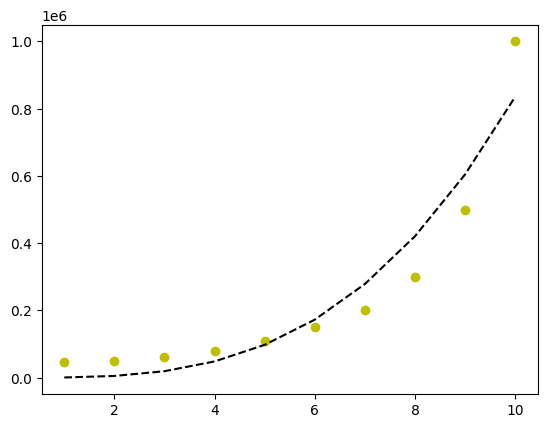

In [28]:
X_plot = df.Level
y_func = poly_model.theta[3]*X*X*X + poly_model.theta[2]*X*X + poly_model.theta[1]*X + poly_model.theta[0]
plt.plot(X_plot, y, 'yo', X, y_func, '--k')
plt.show()